In [2]:
import numpy as np
import pandas as pd

#visualization libraries
import seaborn as sns

import sklearn 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Gather the data

In [3]:
# Read in training and testing data using
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# See a sample of the dataset
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.00,0,0,16966,134.5000,E40,C
335,336,0,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.00,0,0,PC 17590,50.4958,A24,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,NaN,S


# 2. Explore the Data

In [4]:
# See a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sheerlinck, Mr. Jan Baptist",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Feature type summary:


| Feature Type |   |   |   |   |
|  ----  | ----  | ----  | ----  | ----  |
| Continuous Features| Age (Continuous) | Fare (Continuous)| SibSp (Discrete)| Parch (Discrete)|
| Categorical Features| Survived | Sex | Embarked | Pclass |
| Alphanumeric Features| Ticket| Cabin| | |





# 3. Data Cleaning and Data Visualization

There are 4 stage to do data cleaning:

- Correcting: Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.
- Completing: There are null values or missing data in the age, cabin, and embarked field.
- Creating: we might need to use existing features to create new features to determine if they provide new signals to predict our outcome.
- Converting: we will convert object datatypes to categorical dummy variables.

In [5]:
print('Features with null values:\n', train.isnull().sum())

Features with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data completing:

### Missing feature summary:
The Age, Cabin and Embarked feature is not complete
- Age: missing 177 features, 19.87% are missing. Since the age feature is relatively important, so we will complete them using the mean of age.

- Cabin: missing 687 features, 77.10% are missing, we will drop this column.

- Embarked: missing 2 features, 0.22% are missing, which should be relatively harmless.

In [6]:
train['Age'].fillna(train['Age'].median(), inplace = True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)


CabinFeature = train.iloc[:,[1, 10]]
TicketFeature = train.iloc[:,[1, 8]]
PassengerIdFeature = train.iloc[:,[1, 0]]

drop_column = ['Cabin', 'Ticket', 'PassengerId']
train.drop(drop_column, axis=1, inplace = True)


# print('Features with null values:\n', train.isnull().sum())

train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
652,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8.4333,S
368,1,3,"Jermyn, Miss. Annie",female,28.0,0,0,7.7500,Q
881,0,3,"Markun, Mr. Johann",male,33.0,0,0,7.8958,S
771,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,7.8542,S
810,0,3,"Alexander, Mr. William",male,26.0,0,0,7.8875,S


## Data correcting:

- We care about whether there exit some unacceptable data inputs. For example, a person has age greater than 120.
- In the meantime, we want to check whether there is some outlier (but reasonable values), and we will wait until after we complete our analysis to determine if we should include them to our dataset.

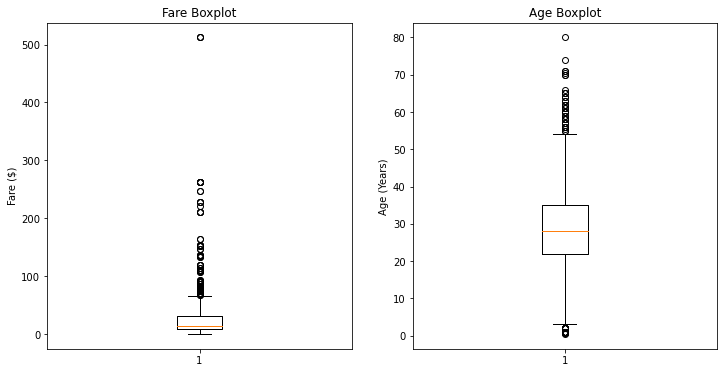

In [7]:
plt.figure(figsize=[12, 6])
plt.subplot(121)
plt.boxplot(x=train['Fare'])
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(122)
plt.boxplot(train['Age'])
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')
plt.show()


From above boxplot we can see that:
- The age feature is welled distributed and all acceptable.
- The fare feature is all acceptable but has one outlier has value 500.


## Data Creating:

First, we will explore our data with graphical statistics to describe and summarize our variables. After we got the graphical statistics, we can determining their correlation with the target variable and each other.

In [8]:
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


train['Title'] = train['Title'].apply(lambda x: 'Other' if x not in ['Mr', 'Miss', 'Mrs', 'Master'] else x)

train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
140,0,3,"Boulos, Mrs. Joseph (Sultana)",female,28.0,0,2,15.2458,C,Mrs
767,0,3,"Mangan, Miss. Mary",female,30.5,0,0,7.7500,Q,Miss
509,1,3,"Lang, Mr. Fang",male,26.0,0,0,56.4958,S,Mr
801,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,26.2500,S,Mrs
789,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,79.2000,C,Mr
791,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,26.0000,S,Mr
345,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,13.0000,S,Miss
756,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,7.7958,S,Mr
264,0,3,"Henry, Miss. Delia",female,28.0,0,0,7.7500,Q,Miss
144,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,11.5000,S,Mr


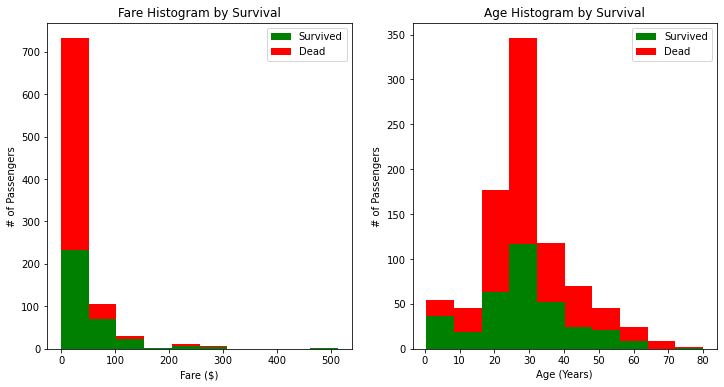

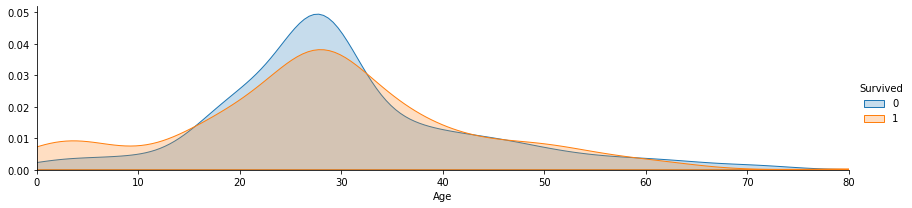

In [9]:
plt.figure(figsize=[12, 6])

plt.subplot(121)
plt.hist(x = [train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(122)
plt.hist(x = [train[train['Survived']==1]['Age'], train[train['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

a = sns.FacetGrid( train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

<AxesSubplot:xlabel='Title', ylabel='Survived'>

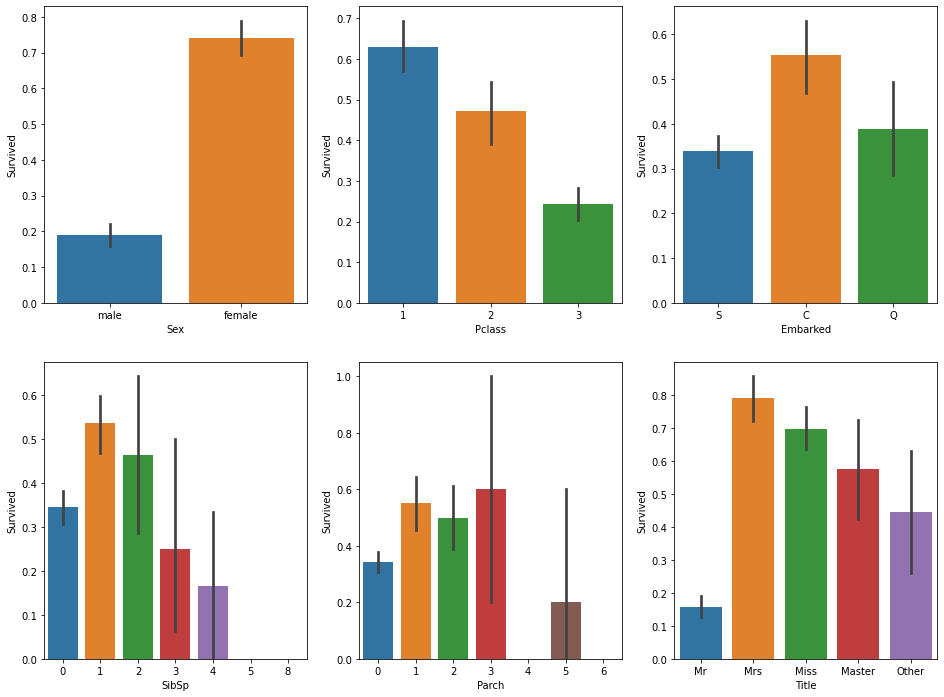

In [10]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x="Sex", y="Survived", data=train, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train, ax = saxis[0,1])
sns.barplot(x="SibSp", y="Survived", data=train, ax = saxis[1,0])

sns.barplot(x = 'Embarked', y = 'Survived', data=train, ax = saxis[0,2])
sns.barplot(x="Parch", y="Survived", data=train, ax = saxis[1,1])

sns.barplot(x="Title", y="Survived", data=train, ax = saxis[1,2])

From plot above, there may be some relation between SibSp and Parch, therefore we construct a new feature called family size.

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

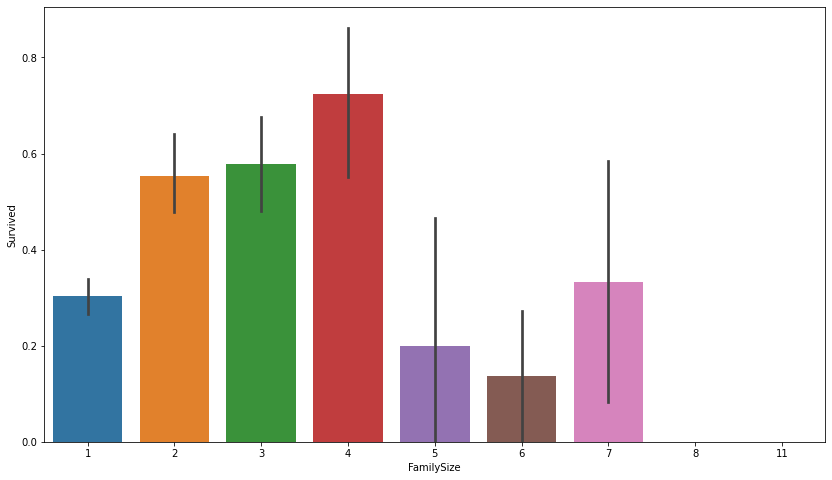

In [11]:
train['FamilySize'] = train ['SibSp'] + train['Parch'] + 1

fig, (axis1) = plt.subplots(1,1,figsize=(14,8))
sns.barplot(x = 'FamilySize', y = 'Survived', data=train, ax = axis1)

## Data Converting
We will convert object datatypes to categorical dummy variables. The categorical features we have are sex, enbarked and title.

In [12]:
label = LabelEncoder()

train['Sex_Code'] = label.fit_transform(train['Sex'])
train['Embarked_Code'] = label.fit_transform(train['Embarked'])
train['Title_Code'] = label.fit_transform(train['Title'])

In [13]:
train.sample(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Sex_Code,Embarked_Code,Title_Code
393,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,113.2750,C,Miss,2,0,0,1
75,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,Mr,1,1,2,2
495,0,3,"Yousseff, Mr. Gerious",male,28.0,0,0,14.4583,C,Mr,1,1,0,2
603,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,8.0500,S,Mr,1,1,2,2
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,31.3875,S,Mrs,7,0,2,3
478,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,7.5208,S,Mr,1,1,2,2
689,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,211.3375,S,Miss,2,0,2,1
470,0,3,"Keefe, Mr. Arthur",male,28.0,0,0,7.2500,S,Mr,1,1,2,2
713,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,9.4833,S,Mr,1,1,2,2
536,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,26.5500,S,Other,1,1,2,4


In [13]:
train.describe(include = "all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Sex_Code,Embarked_Code,Title_Code
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,5,NaN,NaN,NaN,NaN
top,NaN,NaN,"Sheerlinck, Mr. Jan Baptist",male,NaN,NaN,NaN,NaN,S,Mr,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646,517,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN,NaN,1.904602,0.647587,1.536476,1.906846
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN,NaN,1.613459,0.477990,0.791503,0.798361
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,1.000000,0.000000,1.000000,2.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,1.000000,1.000000,2.000000,2.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,2.000000,1.000000,2.000000,2.000000


# 4. Data Cleaning for test data


In [14]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
351,1243,2,"Stokes, Mr. Philip Joseph",male,25.0,0,0,F.C.C. 13540,10.5000,NaN,S
384,1276,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,NaN,S


In [15]:
print('Features with null values:\n', test.isnull().sum())

Features with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


The Age, Cabin and Embarked feature is not complete
- Age: missing 177 features. Since the age feature is relatively important, so we will complete them using the mean of age.

- Cabin: missing 687 features, we will drop this column.

- Fare: missing 1 features, which should be relatively harmless.

In [16]:
drop_column = ['Cabin', 'Ticket', 'PassengerId']
test.drop(drop_column, axis=1, inplace = True)

test['Age'].fillna(test['Age'].median(), inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)

test.sample(5)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
360,3,"Sage, Master. William Henry",male,14.5,8,2,69.5500,S
374,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,81.8583,S
287,1,"Snyder, Mr. John Pillsbury",male,24.0,1,0,82.2667,S
163,3,"Pearce, Mr. Ernest",male,27.0,0,0,7.0000,S
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S


In [17]:
print('Features with null values:\n', test.isnull().sum())

Features with null values:
 Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [18]:
test['Title'] = test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

test['Title'] = test['Title'].apply(lambda x: 'Other' if x not in ['Mr', 'Miss', 'Mrs', 'Master'] else x)

test['FamilySize'] = test ['SibSp'] + test['Parch'] + 1

label = LabelEncoder()

test['Sex_Code'] = label.fit_transform(test['Sex'])
test['Embarked_Code'] = label.fit_transform(test['Embarked'])
test['Title_Code'] = label.fit_transform(test['Title'])


In [19]:
test.sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Sex_Code,Embarked_Code,Title_Code
294,3,"Wittevrongel, Mr. Camille",male,36.0,0,0,9.5000,S,Mr,1,1,2,2
145,3,"Vander Planke, Mr. Julius",male,31.0,3,0,18.0000,S,Mr,4,1,2,2
399,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,7.7333,Q,Mr,1,1,1,2
301,2,"Malachard, Mr. Noel",male,27.0,0,0,15.0458,C,Mr,1,1,0,2
6,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q,Miss,1,0,1,1
72,3,"Nieminen, Miss. Manta Josefina",female,29.0,0,0,7.9250,S,Miss,1,0,2,1
225,3,"Moubarek, Mrs. George (Omine Amenia"" Alexander)""",female,27.0,0,2,15.2458,C,Mrs,3,0,0,3
264,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30.0,0,0,12.7375,C,Mr,1,1,0,2
16,2,"Keane, Mr. Daniel",male,35.0,0,0,12.3500,Q,Mr,1,1,1,2
209,3,"Delalic, Mr. Redjo",male,25.0,0,0,7.8958,S,Mr,1,1,2,2


In [20]:
train.describe(include = "all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Sex_Code,Embarked_Code,Title_Code
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,5,NaN,NaN,NaN,NaN
top,NaN,NaN,"Sheerlinck, Mr. Jan Baptist",male,NaN,NaN,NaN,NaN,S,Mr,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646,517,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN,NaN,1.904602,0.647587,1.536476,1.906846
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN,NaN,1.613459,0.477990,0.791503,0.798361
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,1.000000,0.000000,1.000000,2.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,1.000000,1.000000,2.000000,2.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,2.000000,1.000000,2.000000,2.000000


# 5. Model

Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Naive Bayes classifier
- Decision Tree
- Neural network
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Random Forest

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

In [105]:
df_feature = ['Pclass', 'Sex_Code', 'Age', 'Fare', 'Embarked_Code',  'Title_Code', 'FamilySize', 'SibSp', 'Parch']

X = train[df_feature]
y = train["Survived"]

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)

x_train.head()

modelName = []
modelAcc= []
modelValAcc = [78.36, 78.73, 82.67, 79.78, 80.10, 73.52, 83.95, 82.03]


X_test = test[df_feature]

# 6. Fine tune Model

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

## Navie Bayes: 

There isn't a hyper-parameter to tune for Navie Bayes, so I have nothing to grid search over.

### Gaussian Navie Bayes

In [24]:
gaussian = GaussianNB()

gaussian.fit(x_train, y_train)

y_pred = gaussian.predict(x_val)

acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

modelName.append("Gaussian Naive bayes")
modelAcc.append(acc_gaussian)


78.36


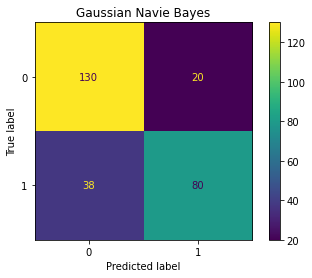

In [25]:
conf = confusion_matrix(y_pred,y_val)

ConfusionMatrixDisplay(conf).plot()
plt.title("Gaussian Navie Bayes")
plt.show()

### Bernoulli Navie Bayes


In [26]:
Bernoulli = BernoulliNB()
Bernoulli.fit(x_train, y_train)

y_pred = Bernoulli.predict(x_val)
accBernoulli= round(accuracy_score(y_pred, y_val) * 100, 2)
print(accBernoulli)


modelName.append("Bernoulli Naive bayes")
modelAcc.append(accBernoulli)

78.73


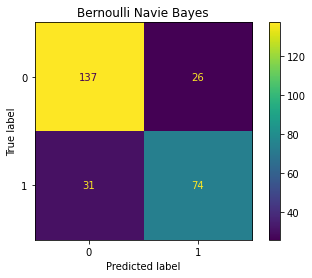

In [27]:
conf = confusion_matrix(y_pred,y_val)

ConfusionMatrixDisplay(conf).plot()
plt.title("Bernoulli Navie Bayes")
plt.show()

## Decision Tree:

In [28]:
from sklearn import tree
# Decision tree model.

params = {'criterion': ['gini', 'entropy'], 
        'max_depth': range(1, 10),
        'min_samples_leaf': range(1,5)
        }


decisiontree = DecisionTreeClassifier()

grid_search_cv =  GridSearchCV(decisiontree, params, verbose=1, cv=5)

grid_search_cv.fit(x_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5)},
             verbose=1)

In [29]:
grid_search_cv.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}

In [30]:
grid_search_cv.best_score_


0.8266580645161291

In [31]:
decisiontree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, min_samples_leaf= 1)
decisiontree.fit(x_train, y_train)

y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)


modelName.append("Decision Tree")
modelAcc.append(acc_decisiontree)

82.46


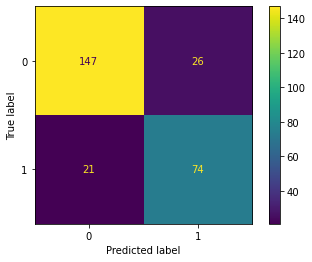

In [32]:
conf = confusion_matrix(y_pred,y_val)

ConfusionMatrixDisplay(conf).plot()
plt.show()

[Text(334.8, 570.7800000000001, 'X[1] <= 0.5\nentropy = 0.964\nsamples = 623\nvalue = [381, 242]'),
 Text(167.4, 407.70000000000005, 'X[0] <= 2.5\nentropy = 0.806\nsamples = 215\nvalue = [53, 162]'),
 Text(83.7, 244.62, 'X[2] <= 2.5\nentropy = 0.349\nsamples = 122\nvalue = [8, 114]'),
 Text(41.85, 81.53999999999996, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 81.53999999999996, 'entropy = 0.319\nsamples = 121\nvalue = [7, 114]'),
 Text(251.10000000000002, 244.62, 'X[6] <= 4.5\nentropy = 0.999\nsamples = 93\nvalue = [45, 48]'),
 Text(209.25, 81.53999999999996, 'entropy = 0.957\nsamples = 74\nvalue = [28, 46]'),
 Text(292.95, 81.53999999999996, 'entropy = 0.485\nsamples = 19\nvalue = [17, 2]'),
 Text(502.20000000000005, 407.70000000000005, 'X[5] <= 1.0\nentropy = 0.714\nsamples = 408\nvalue = [328, 80]'),
 Text(418.5, 244.62, 'X[6] <= 4.5\nentropy = 0.993\nsamples = 31\nvalue = [14, 17]'),
 Text(376.65000000000003, 81.53999999999996, 'entropy = 0.0\nsamples =

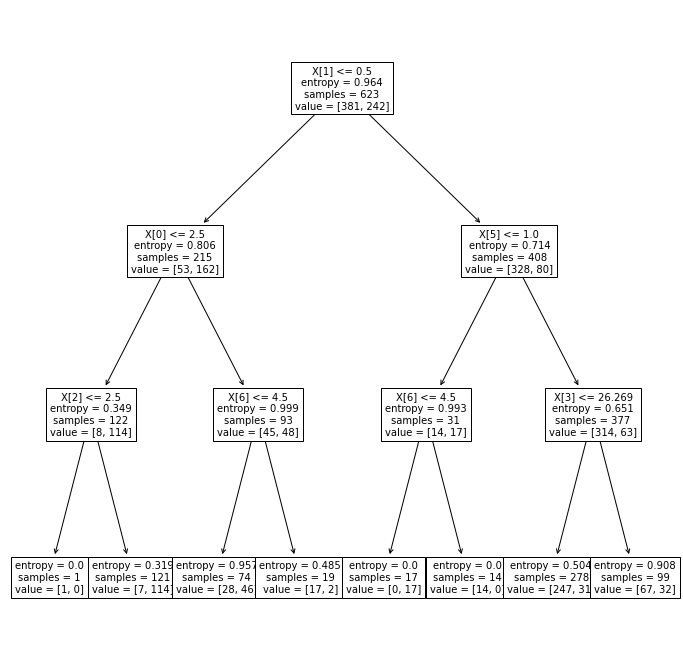

In [33]:

plt.figure(figsize=(12,12))
tree.plot_tree(decisiontree, fontsize=10)

## Neural Network

### Muti-layer Perceptron

In [69]:
mlp = MLPClassifier(max_iter=1000)

params = {
    'hidden_layer_sizes': [(10,),(15,),(20,),(10,15,20), (10, 20, 30)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid_search_cv = GridSearchCV(mlp, params, n_jobs=-1, cv=5)
grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01, 0.05],
                         'hidden_layer_sizes': [(10,), (15,), (20,),
                                                (10, 15, 20), (10, 20, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [70]:
grid_search_cv.best_params_

{'activation': 'logistic',
 'alpha': 0.01,
 'hidden_layer_sizes': (15,),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [71]:
grid_search_cv.best_score_

0.8250709677419354

In [74]:
MLP = MLPClassifier(activation= 'logistic',
                        alpha= 0.01,
                        hidden_layer_sizes= (15,),
                        learning_rate= 'adaptive',
                        solver= 'adam', max_iter=1000)
MLP.fit(x_train, y_train)

y_pred = MLP.predict(x_val)
acc_MLP = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_MLP)

modelName.append("Muti-layer Perceptron")
modelAcc.append(acc_MLP)


80.97


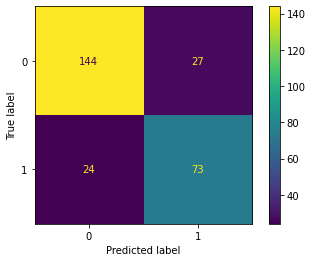

In [75]:
conf = confusion_matrix(y_pred,y_val)

ConfusionMatrixDisplay(conf).plot()
plt.show()

### Deep neural Network

In [ ]:
# Create sturucture of the Neural Network
model = Sequential()
model.add(Dense(units = 32, input_shape = (9,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'uniform', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'uniform', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'uniform', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'uniform', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))

In [ ]:
# Train the model with Adam optimizers
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 32, verbose = 1, epochs = 50)
score = model.evaluate(x_val, y_val, verbose=0)
NN_acc = score[1]
print(NN_acc)

modelName.append("Deep Neural Network")
modelAcc.append(round(NN_acc*100, 2))

## Logistic Regression

In [76]:
logreg = LogisticRegression(max_iter=100000)

params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

grid_search_cv = GridSearchCV(logreg, params, n_jobs=-1, cv=5)

grid_search_cv.fit(x_train, y_train)


/Users/dongbochen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.66609032        nan 0.70784516        nan 0.79781935
        nan 0.78821935        nan 0.78660645        nan 0.78660645
        nan 0.78660645]
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [77]:
grid_search_cv.best_score_

0.7978193548387098

In [78]:
grid_search_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [50]:
logreg = LogisticRegression(max_iter=100000, C= 0.1, penalty="l2")
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_val)

logregacc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(logregacc)

modelName.append("Logistic Regression")
modelAcc.append(logregacc)

80.97


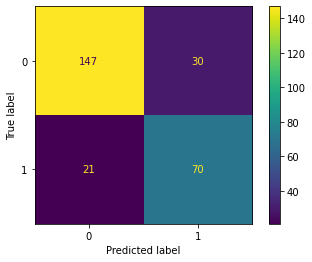

In [51]:
conf = confusion_matrix(y_pred,y_val)

ConfusionMatrixDisplay(conf).plot()
plt.show()

In [88]:
# SVM model.

svc = SVC()

params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'scale'],
              'kernel': ['rbf']}

grid_search_cv = GridSearchCV(svc, params, n_jobs=-1, cv=5)

grid_search_cv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale'],
                         'kernel': ['rbf']})

In [89]:
grid_search_cv.best_score_


0.8010193548387097

In [90]:
grid_search_cv.best_params_

{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}

In [48]:
svc = SVC(C = 1000, gamma='scale',kernel='rbf')
svc.fit(x_train, y_train)

y_pred = svc.predict(x_val)
SVMACC = round(accuracy_score(y_pred, y_val) * 100, 2)
print(SVMACC)

modelName.append("Support Vector Machines")
modelAcc.append(SVMACC)

78.73


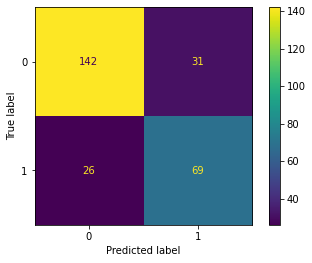

In [49]:
conf = confusion_matrix(y_pred,y_val)

ConfusionMatrixDisplay(conf).plot()
plt.show()

## KNN

In [96]:
knn = KNeighborsClassifier()

params = {'n_neighbors': [3, 5, 7, 9, 11, 13],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

grid_search_cv = GridSearchCV(knn, params, n_jobs=-1, cv=5)

grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']})

In [97]:
grid_search_cv.best_score_

0.7352387096774193

In [98]:
grid_search_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [46]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights='uniform')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

modelName.append("KNN")
modelAcc.append(acc_knn)

70.9


/Users/dongbochen/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


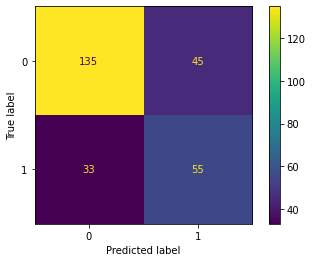

In [47]:
conf = confusion_matrix(y_pred,y_val)

ConfusionMatrixDisplay(conf).plot()
plt.show()

## Random Forest

In [55]:
randomforest = RandomForestClassifier()

params = {'bootstrap': [True, False],
            'max_depth': [30, 40, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [100, 200, 400, 600]}

grid_search_cv = GridSearchCV(randomforest, params, n_jobs=-1, cv=5)

grid_search_cv.fit(x_train, y_train)



In [35]:
grid_search_cv.best_score_


0.8395354838709677

In [36]:
grid_search_cv.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [53]:
randomforest = RandomForestClassifier(bootstrap= True, max_depth= 100,
 max_features='auto',
 min_samples_leaf= 4,
 min_samples_split=10,
 n_estimators= 200)
randomforest.fit(x_train, y_train)

y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

modelName.append("Random Forest")
modelAcc.append(acc_randomforest)

83.58


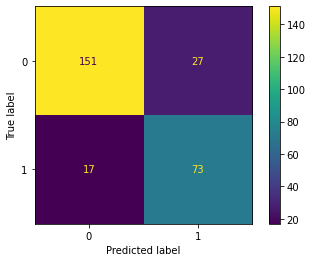

In [54]:
conf = confusion_matrix(y_pred,y_val)

ConfusionMatrixDisplay(conf).plot()
plt.show()

## Gradient Boosting

In [40]:
gbk = GradientBoostingClassifier()

params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

grid_search_cv = GridSearchCV(gbk, params, n_jobs=-1, cv=5)

grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'n_estimators': [10],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]})

In [41]:
grid_search_cv.best_score_

0.820283870967742

In [42]:
grid_search_cv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2090909090909091,
 'n_estimators': 10,
 'subsample': 1.0}

In [43]:
gbk = GradientBoostingClassifier(criterion='friedman_mse',
 learning_rate=0.2,
 loss='deviance',
 max_depth=5,
 max_features='sqrt',
 min_samples_leaf= 0.1,
 min_samples_split= 0.2090909090909091,
 n_estimators=10,
 subsample= 1.0)
gbk.fit(x_train, y_train)

y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

modelName.append("Gradient Boosting")
modelAcc.append(acc_gbk)

80.22


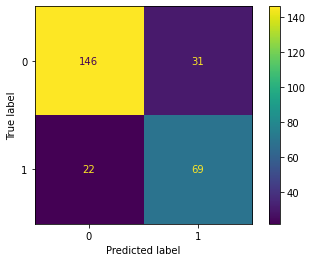

In [44]:
conf = confusion_matrix(y_pred,y_val)

ConfusionMatrixDisplay(conf).plot()
plt.show()

In [52]:
models = pd.DataFrame({
    'Model': modelName,
    'Score': modelAcc})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,82.46
3,Random Forest,82.46
7,Logistic Regression,80.97
4,Gradient Boosting,80.22
1,Bernoulli Naive bayes,78.73
6,Support Vector Machines,78.73
0,Gaussian Naive bayes,78.36
5,KNN,70.90


In [106]:
models = pd.DataFrame({
    'Model': modelName,
    'modelValAcc': modelValAcc})
    
models.sort_values(by='modelValAcc', ascending=False)

ValueError: arrays must all be same length